In [ ]:
%pip install idx2numpy
%pip install numpy
%pip install matplotlib

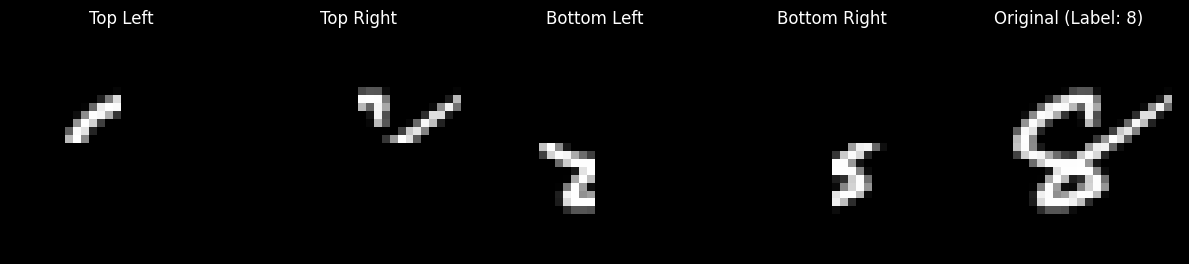

In [2]:
import os
import numpy as np
import idx2numpy
import shutil
import matplotlib.pyplot as plt


def read_mnist_images(file_path):
    return idx2numpy.convert_from_file(file_path)


def read_mnist_labels(file_path):
    return idx2numpy.convert_from_file(file_path)


def split_image_with_padding(img):
    transparent_pixel = 0

    top_left = np.full((28, 28), transparent_pixel)
    top_right = np.full((28, 28), transparent_pixel)
    bottom_left = np.full((28, 28), transparent_pixel)
    bottom_right = np.full((28, 28), transparent_pixel)

    top_left[:14, :14] = img[:14, :14]
    top_right[:14, 14:] = img[:14, 14:]
    bottom_left[14:, :14] = img[14:, :14]
    bottom_right[14:, 14:] = img[14:, 14:]

    return top_left, top_right, bottom_left, bottom_right


def save_splits(images, labels, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    sections = ["top_left", "top_right", "bottom_left", "bottom_right"]

    for idx, img in enumerate(images):
        top_left, top_right, bottom_left, bottom_right = split_image_with_padding(img)
        splits = [top_left, top_right, bottom_left, bottom_right]

        for sec, split_img in zip(sections, splits):
            section_dir = os.path.join(save_dir, sec)
            if not os.path.exists(section_dir):
                os.makedirs(section_dir)
            np.save(os.path.join(section_dir, f"{sec}_image_{idx}.npy"), split_img)
            np.save(os.path.join(section_dir, f"{sec}_label_{idx}.npy"), labels[idx])


def compress(folders, root):
    for folder in folders:
        shutil.make_archive(
            os.path.join(root, folder), "tar", os.path.join(root, folder)
        )
        shutil.rmtree(os.path.join(root, folder))


def plot_splits(img, label):
    top_left, top_right, bottom_left, bottom_right = split_image_with_padding(img)

    plt.figure(figsize=(12, 5))

    # Plot top-left
    plt.subplot(1, 5, 1)
    plt.imshow(top_left, cmap="gray")
    plt.title("Top Left")
    plt.axis("off")

    # Plot top-right
    plt.subplot(1, 5, 2)
    plt.imshow(top_right, cmap="gray")
    plt.title("Top Right")
    plt.axis("off")

    # Plot bottom-left
    plt.subplot(1, 5, 3)
    plt.imshow(bottom_left, cmap="gray")
    plt.title("Bottom Left")
    plt.axis("off")

    # Plot bottom-right
    plt.subplot(1, 5, 4)
    plt.imshow(bottom_right, cmap="gray")
    plt.title("Bottom Right")
    plt.axis("off")

    # Plot original image
    plt.subplot(1, 5, 5)
    plt.imshow(img, cmap="gray")
    plt.title(f"Original (Label: {label})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# Load the MNIST training images and labels
images = read_mnist_images("control/MNIST/raw/train-images-idx3-ubyte")
labels = read_mnist_labels("control/MNIST/raw/train-labels-idx1-ubyte")

# Let's plot splits for the first image as an example
random = np.random.randint(0, len(images))
plot_splits(images[random], labels[random])

save_splits(images, labels, "four/")
sections = ["top_left", "top_right", "bottom_left", "bottom_right"]
compress(sections, "four/")